# Analysis of the Noita Eye Cipher

### Citations:

Cipher codes pulled from here: https://docs.google.com/document/d/1s6gxrc1iLJ78iFfqC2d4qpB9_r_c5U5KwoHVYFFrjy0/edit#

In [1]:
# Imports (Running )
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import os

from eyecipher.cipher_message import CipherMessage

In [2]:
# Define cipher file locations
base_dir = os.path.join("cipher_data", "interleaved")
east1 =  os.path.join(base_dir, "east1")
west1 =  os.path.join(base_dir, "west1")
east2 =  os.path.join(base_dir, "east2")
west2 =  os.path.join(base_dir, "west2")
east3 =  os.path.join(base_dir, "east3")
west3 =  os.path.join(base_dir, "west3")
east4 =  os.path.join(base_dir, "east4")
west4 =  os.path.join(base_dir, "west4")
east5 =  os.path.join(base_dir, "east5")

east1_message = CipherMessage(file_name = east1, name = "East 1")
west1_message = CipherMessage(file_name = west1, name = "West 1")
east2_message = CipherMessage(file_name = east2, name = "East 2")
west2_message = CipherMessage(file_name = west2, name = "West 2")
east3_message = CipherMessage(file_name = east3, name = "East 3")
west3_message = CipherMessage(file_name = west3, name = "West 3")
east4_message = CipherMessage(file_name = east4, name = "East 4")
west4_message = CipherMessage(file_name = west4, name = "West 4")
east5_message = CipherMessage(file_name = east5, name = "East 5")

all_messages = [east1_message,  west1_message, east2_message, \
                west2_message, east3_message, west3_message, \
                east4_message, west4_message, east5_message]

### TODO: Set up known encoded mesages here

In [80]:
str(east5_message.shuffle_trigrams())


'\'>)JY)95Zk([HB*%\\[Ob2gI49k*%]j:hW,VibBAd\\_&JeL7S?`H%,lDH&pA6VT8#U"flQ5^6=>W9V\\"<NBh;M)JPoI2\'AQ[_BS5%(3^]%c@PV?iL/W'

## Character Frequency Analysis

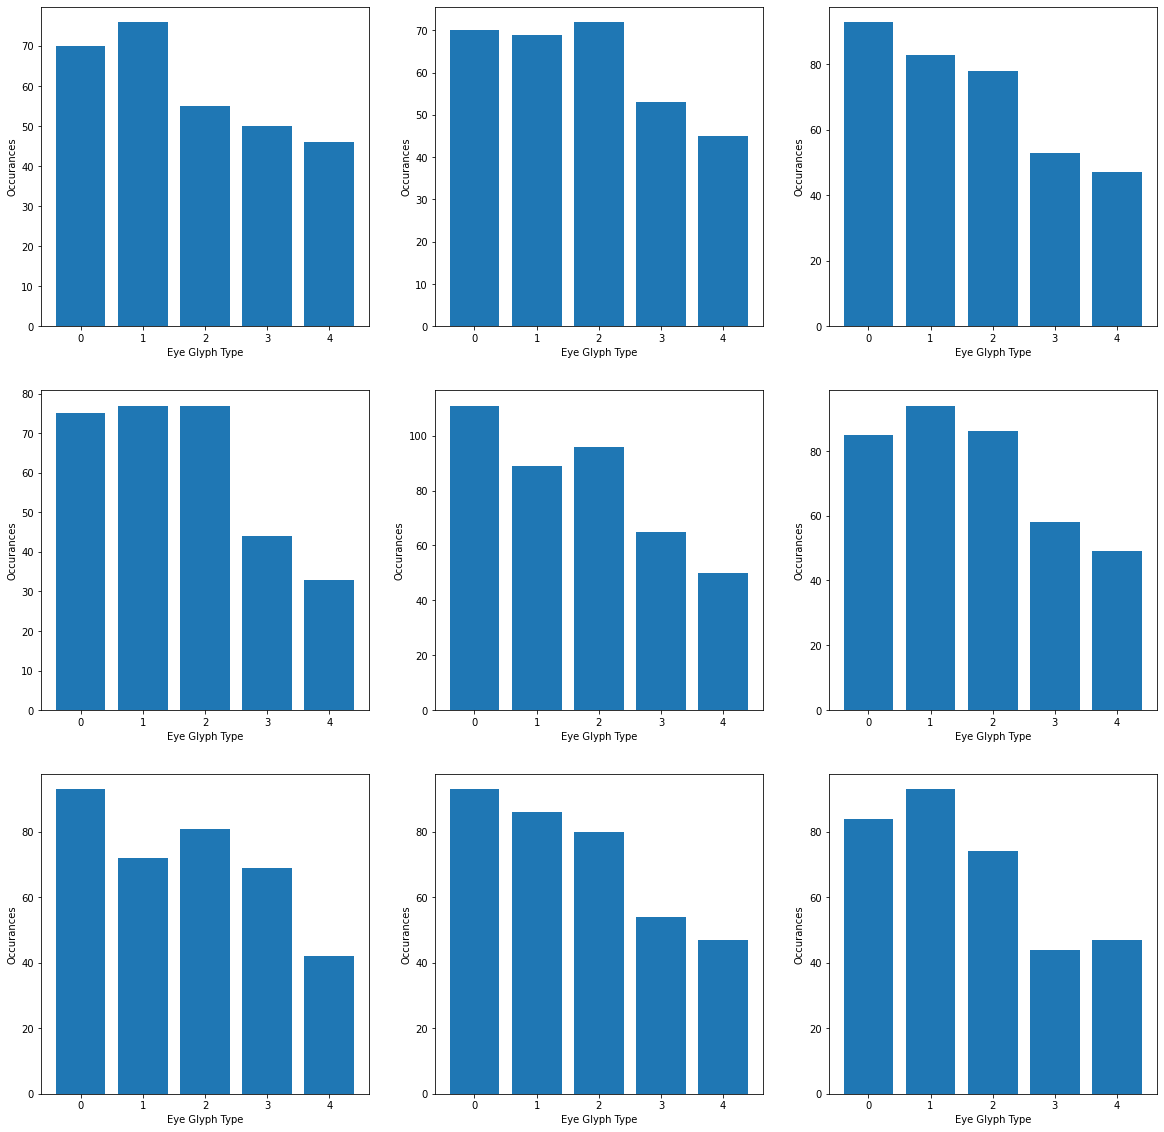

In [94]:
plt.figure(figsize=(20,20))

subplot_num = 1
for message in all_messages:
    # Grab counter data
    eyes = Counter(message.eyes)
    eyes = sorted(eyes.items())
    keys = [i[0] for i in eyes]
    vals = [i[1] for i in eyes]

    # Plot
    plt.subplot(3,3,subplot_num)
    plt.bar(keys, vals)
    plt.xlabel("Eye Glyph Type")
    plt.ylabel("Occurances")
    
    subplot_num += 1


plt.show()



## Bigram analysis

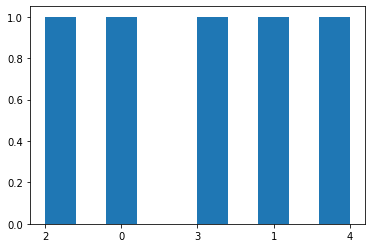